In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [22]:
data=pd.read_csv('BostonHousing.csv')
data.head()

,Crime_rate,zn,indus,chas,nox,rm,Age,Distance,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
data.fillna(data.mean(),inplace=True)

In [24]:
data=data[data['lstat']<30]
data=data[data['rm']>4]

✅ data.corr()
This computes the correlation matrix between all numeric columns.

For example: how each feature correlates with every other, especially with medv (target variable).

✅ .abs()
Takes the absolute value of the correlation.

This means both positive and negative correlations are treated equally strong (e.g., +0.9 and -0.9 are both 0.9).

✅ ['medv']
This selects only the correlations of all features with the target medv (Median value of owner-occupied homes).

✅ .sort_values(ascending=False)
Sorts the correlations from strongest to weakest.

Highest correlation appears first.

✅ [1:4]
Skips the first one ([0]) because it’s the correlation of medv with itself (which is always 1).

Selects the next 3 top features most correlated with medv.

✅ .index.tolist()
Gets just the column names (i.e., feature names) as a list.

In [27]:
top_features=data.corr().abs()['medv'].sort_values(ascending=False)[1:4].index.tolist()
print(data[top_features])
X=data[top_features]
y=data['medv']

     lstat     rm  ptratio
0     4.98  6.575     15.3
1     9.14  6.421     17.8
2     4.03  7.185     17.8
3     2.94  6.998     18.7
4     5.33  7.147     18.7
..     ...    ...      ...
501   9.67  6.593     21.0
502   9.08  6.120     21.0
503   5.64  6.976     21.0
504   6.48  6.794     21.0
505   7.88  6.030     21.0

[492 rows x 3 columns]


Every time you run the code, you might get a different split — different train/test sets → different results.

With random_state=42:

python
Copy
Edit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Same train/test split every time, so your results (MSE, R², graphs) are consistent.

No technical reason.

42 became popular because of the book "The Hitchhiker’s Guide to the Galaxy" where 42 is "the answer to life, the universe, and everything."

So, it's a fun geek joke in machine learning too!

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [32]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)


In [35]:
model=LinearRegression()
model.fit(X_train_poly,y_train)
y_pred=model.predict(X_test_poly)

MSE Value	Meaning
< 10	Very good fit (excellent model)
10 - 20	Good model, acceptable errors

In [37]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"MSE : {mse:.2f}")
print(f"R2 : {r2:.4f}")

MSE : 14.15
R2 : 0.8154


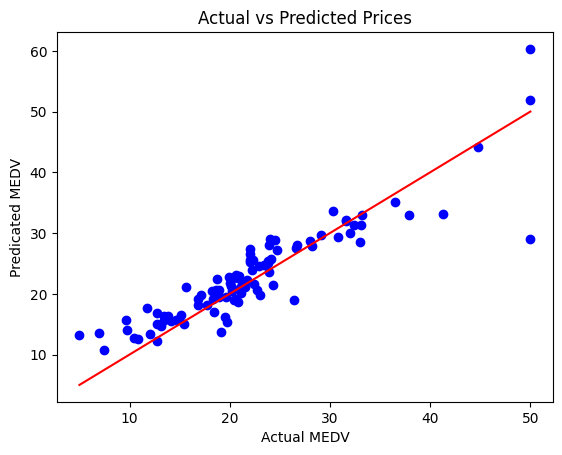

In [38]:
plt.scatter(y_test,y_pred,color='blue')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicated MEDV")
plt.title("Actual vs Predicted Prices")
plt.show()